#Importando as Bibliotecas:

In [547]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

import matplotlib.pyplot as plt
import seaborn as sns

#1ºParte: Coleta de dados e preparação do dataframe:

Interessante notar que cada vez que os comandos abaixo são postos para funcionar, os preços e volumes são constantemente atualizados. Isso gera uma dificuldade, mas também gera uma análise mais precisa que deve considerar a mudança dos preços.

In [548]:
request = requests.get("https://www.coingecko.com/en/nft").text

In [549]:
df = pd.read_html(request)

In [550]:
df1 = df[0]

In [551]:
df1

,#,NFT,Floor Price,24h,7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,Meebits,3.19 ETH,-1.6%,NaN,"63,800.0 ETH","16,724.45 ETH",5747.0,0.0%,20000.0
1,2,dotdotdots,0.19 ETH,-4.0%,NaN,925.3 ETH,"6,356.47 ETH",2650.0,0.2%,4870.0
2,3,Azuki,12.49 ETH,8.6%,NaN,"124,900.0 ETH","1,563.55 ETH",5428.0,0.1%,10000.0
3,4,Bored Ape Yacht Club,99.0 ETH,-2.4%,NaN,"990,000.0 ETH",810.99 ETH,6312.0,0.0%,10000.0
4,5,CloneX,15.15 ETH,-1.8%,NaN,"285,910.8 ETH",713.86 ETH,8287.0,0.1%,18872.0
5,6,Mutant Ape Yacht Club,20.98 ETH,-1.3%,NaN,"376,758.84 ETH",660.34 ETH,11740.0,0.1%,17958.0
6,7,LAND,3.68 ETH,-4.6%,NaN,"536,176.0 ETH",412.25 ETH,19690.0,0.1%,145700.0
7,8,Cool Pets,2.53 ETH,-6.2%,NaN,"46,554.53 ETH",319.87 ETH,10743.0,-0.3%,18401.0
8,9,World of Women,10.84 ETH,10.2%,NaN,"108,400.0 ETH",218.18 ETH,5076.0,-0.1%,10000.0
9,10,Doodles,13.79 ETH,0.7%,NaN,"137,900.0 ETH",215.82 ETH,5996.0,-0.1%,10000.0


- Como eu quero por volta dos últimos 500 NFTs e cada página da coingecko oferece 25 nfts, preciso acessar até a página 20.

In [552]:
dfs = []
for i in range (2, 6):
  request2 = requests.get(f"https://www.coingecko.com/en/nft?page={i}").text
  df = pd.read_html(request2)
  dfs.append(df)

In [553]:
dfs

[[     #                           NFT  ... 24h Owners Total Assets
  0   26                   Phanta Bear  ...      -0.1%      10000.0
  1   27                GenesisApostle  ...      -0.3%       7216.0
  2   28                      BYOPills  ...      -0.4%      10000.0
  3   29                   PUNKS Comic  ...       0.5%      23204.0
  4   30                          Loot  ...      -0.0%       7779.0
  5   31                 JRNY NFT Club  ...      -0.0%      10000.0
  6   32                Lives of Asuna  ...      -0.1%      10000.0
  7   33                     CrypToadz  ...       0.0%       7025.0
  8   34                     LilHeroes  ...      -0.1%       7776.0
  9   35                      Smilesss  ...       0.2%       8732.0
  10  36                    Lost Poets  ...      -0.1%      27681.0
  11  37                    Lazy Lions  ...      -0.1%      10080.0
  12  38                 Boss Beauties  ...       0.1%      10000.0
  13  39                       Blitmap  ...     

In [554]:
len(dfs)

4

In [555]:
datasets = []
for i in range(len(dfs)):
  datasets.append(dfs[i][0])

In [556]:
len(datasets)

4

In [557]:
df_final = pd.concat([df1, datasets[0], datasets[1], datasets[2], datasets[3]], ignore_index=True)

In [558]:
df_final

,#,NFT,Floor Price,24h,7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,Meebits,3.19 ETH,-1.6%,NaN,"63,800.0 ETH","16,724.45 ETH",5747.0,0.0%,20000.0
1,2,dotdotdots,0.19 ETH,-4.0%,NaN,925.3 ETH,"6,356.47 ETH",2650.0,0.2%,4870.0
2,3,Azuki,12.49 ETH,8.6%,NaN,"124,900.0 ETH","1,563.55 ETH",5428.0,0.1%,10000.0
3,4,Bored Ape Yacht Club,99.0 ETH,-2.4%,NaN,"990,000.0 ETH",810.99 ETH,6312.0,0.0%,10000.0
4,5,CloneX,15.15 ETH,-1.8%,NaN,"285,910.8 ETH",713.86 ETH,8287.0,0.1%,18872.0
...,...,...,...,...,...,...,...,...,...,...
120,121,Night Kids,0.0119 ETH,-1.5%,NaN,66.09 ETH,0.01 ETH,2193.0,0.0%,5554.0
121,122,Pudgy Halloween,0.0011 ETH,-85.4%,NaN,0.0 ETH,0.01 ETH,1325.0,0.0%,3.0
122,123,Strange Attractors,ETH,-100.0%,NaN,0.0 ETH,0.0 ETH,292.0,0.0%,526.0
123,124,United Punks Union,0.1 ETH,101.7%,NaN,362.4 ETH,0.0 ETH,1192.0,0.0%,3624.0


###Floor Price:

In [559]:
df_final['Floor Price']

0        3.19 ETH
1        0.19 ETH
2       12.49 ETH
3        99.0 ETH
4       15.15 ETH
          ...    
120    0.0119 ETH
121    0.0011 ETH
122           ETH
123       0.1 ETH
124     0.045 ETH
Name: Floor Price, Length: 125, dtype: object

In [560]:
prices = []
for price in df_final['Floor Price']:
  if type(price) == type('str'):
    price = price.split()
    if 'ETH' in price:
      price[0] = 0
    if len(price) == 0:
      price = [0]
  prices.append(price[0])








In [561]:
print(prices)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [562]:
df_final['Floor Price'] = prices

In [563]:
df_final['Floor Price']

0      0
1      0
2      0
3      0
4      0
      ..
120    0
121    0
122    0
123    0
124    0
Name: Floor Price, Length: 125, dtype: int64

In [564]:
df_final['Floor Price'] = df_final['Floor Price'].astype(float)

###Market Cap:

In [565]:
df_final['Market Cap']

0       63,800.0 ETH
1          925.3 ETH
2      124,900.0 ETH
3      990,000.0 ETH
4      285,910.8 ETH
           ...      
120        66.09 ETH
121          0.0 ETH
122          0.0 ETH
123        362.4 ETH
124       360.36 ETH
Name: Market Cap, Length: 125, dtype: object

In [566]:
market_caps = []
for market_cap in df_final['Market Cap']:
  market_cap = market_cap.split()
  market_caps.append(market_cap[0])

In [567]:
for i in market_caps:
  if type(i) != type('str'):
    print('Não tem dados com tipo string')

In [568]:
market_caps_final = []
for mks in market_caps:
  mks = mks.split(',')
  if len(mks) > 1:
    mks = mks[0] + '' + mks[1]
    market_caps_final.append(mks)
  else:
    market_caps_final.append(mks[0])


In [569]:
df_final['Market Cap'] = market_caps_final

In [570]:
market_caps_final = df_final['Market Cap'].astype(float)

###24h(Variação em %):

In [571]:
df_final = df_final.rename(columns={'24h':'24h(%)'})

In [572]:
df_final.head()

,#,NFT,Floor Price,24h(%),7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,Meebits,0.0,-1.6%,NaN,63800.0,"16,724.45 ETH",5747.0,0.0%,20000.0
1,2,dotdotdots,0.0,-4.0%,NaN,925.3,"6,356.47 ETH",2650.0,0.2%,4870.0
2,3,Azuki,0.0,8.6%,NaN,124900.0,"1,563.55 ETH",5428.0,0.1%,10000.0
3,4,Bored Ape Yacht Club,0.0,-2.4%,NaN,990000.0,810.99 ETH,6312.0,0.0%,10000.0
4,5,CloneX,0.0,-1.8%,NaN,285910.8,713.86 ETH,8287.0,0.1%,18872.0


In [573]:
tfhours = []
try:
  for per in df_final['24h(%)']:
    per = per.split('%')
    tfhours.append(float(per[0]))
except:
  print("not valid")

In [574]:
if len(tfhours) > 0:
  df_final['24h(%)'] = tfhours

In [575]:
df_final.head()

,#,NFT,Floor Price,24h(%),7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,Meebits,0.0,-1.6,NaN,63800.0,"16,724.45 ETH",5747.0,0.0%,20000.0
1,2,dotdotdots,0.0,-4.0,NaN,925.3,"6,356.47 ETH",2650.0,0.2%,4870.0
2,3,Azuki,0.0,8.6,NaN,124900.0,"1,563.55 ETH",5428.0,0.1%,10000.0
3,4,Bored Ape Yacht Club,0.0,-2.4,NaN,990000.0,810.99 ETH,6312.0,0.0%,10000.0
4,5,CloneX,0.0,-1.8,NaN,285910.8,713.86 ETH,8287.0,0.1%,18872.0


###24h Volume:

In [576]:
df_final['24h Volume']

0      16,724.45 ETH
1       6,356.47 ETH
2       1,563.55 ETH
3         810.99 ETH
4         713.86 ETH
           ...      
120         0.01 ETH
121         0.01 ETH
122          0.0 ETH
123          0.0 ETH
124          0.0 ETH
Name: 24h Volume, Length: 125, dtype: object

In [577]:
daily_volumes  = []
for daily_volume in df_final['24h Volume']:
  if ',' in daily_volume:
    daily_volume = daily_volume.split(',')
    daily_volume = daily_volume[0] + '' + daily_volume[1]
    daily_volume = daily_volume.split()
    daily_volumes.append(daily_volume[0])
  else:  
    daily_volume = daily_volume.split()
    daily_volume = daily_volume[0]
    daily_volumes.append(daily_volume)


In [578]:
daily_volumes
    

['16724.45',
 '6356.47',
 '1563.55',
 '810.99',
 '713.86',
 '660.34',
 '412.25',
 '319.87',
 '218.18',
 '215.82',
 '193.79',
 '191.12',
 '142.95',
 '133.33',
 '114.87',
 '112.96',
 '101.43',
 '87.96',
 '84.0',
 '83.4',
 '71.75',
 '58.63',
 '54.78',
 '54.69',
 '53.27',
 '53.24',
 '49.95',
 '49.36',
 '46.55',
 '45.81',
 '45.35',
 '39.36',
 '36.4',
 '36.33',
 '32.37',
 '32.31',
 '28.68',
 '27.45',
 '25.39',
 '22.76',
 '21.99',
 '21.4',
 '21.37',
 '20.2',
 '19.78',
 '19.49',
 '18.18',
 '15.53',
 '14.91',
 '14.68',
 '14.49',
 '12.92',
 '12.45',
 '12.39',
 '12.34',
 '11.78',
 '11.54',
 '8.91',
 '8.39',
 '7.69',
 '5.99',
 '5.8',
 '5.54',
 '5.17',
 '4.63',
 '4.14',
 '3.5',
 '3.5',
 '3.39',
 '3.33',
 '2.95',
 '2.82',
 '2.69',
 '2.57',
 '2.53',
 '2.28',
 '2.15',
 '2.0',
 '1.98',
 '1.83',
 '1.78',
 '1.68',
 '1.59',
 '1.37',
 '1.21',
 '1.1',
 '1.09',
 '1.07',
 '0.95',
 '0.93',
 '0.81',
 '0.77',
 '0.64',
 '0.62',
 '0.62',
 '0.58',
 '0.54',
 '0.51',
 '0.51',
 '0.49',
 '0.45',
 '0.44',
 '0.39',
 '0.3

In [579]:
df_final['24h Volume'] = daily_volumes

In [580]:
df_final['24h Volume'].astype(float)

0      16724.45
1       6356.47
2       1563.55
3        810.99
4        713.86
         ...   
120        0.01
121        0.01
122        0.00
123        0.00
124        0.00
Name: 24h Volume, Length: 125, dtype: float64

###24h Owners:

In [581]:
df_final['24h Owners']

0      0.0%
1      0.2%
2      0.1%
3      0.0%
4      0.1%
       ... 
120    0.0%
121    0.0%
122    0.0%
123    0.0%
124    0.0%
Name: 24h Owners, Length: 125, dtype: object

In [582]:
daily_owners = []
for d_owner in df_final['24h Owners']:
  d_owner = d_owner.split('%')
  daily_owners.append(d_owner[0])

In [583]:
df_final['24h Owners'] = daily_owners

In [584]:
len(daily_owners)

125

In [585]:
for els in df_final['24h Owners']:
  if type(els) != type('str'):
    df_final['24h Owners'].astype(float)

##Razão dos proprietários (Owner Ratio):

In [586]:
df_final['Owner Ratio'] = df_final['Owners'] / df_final ['Total Assets']

In [587]:
df_final['Owner Ratio'] = df_final['Owner Ratio']*100

#2ºParte: Limpeza dos dados

In [588]:
df_final.isnull().sum()

#                 0
NFT               0
Floor Price       0
24h(%)            0
7d              125
Market Cap        0
24h Volume        0
Owners            0
24h Owners        0
Total Assets      0
Owner Ratio       0
dtype: int64

In [589]:
df_final.drop(columns=["7d", "#"], inplace=True)

In [590]:
df_final.duplicated().sum()

0

In [591]:
df = df_final

#Salvando em CSV:

In [592]:
df.to_csv(r'/content/df_final.csv', index=False, header=True)

In [593]:
df_test = pd.read_csv("df_final.csv")

In [594]:
df_test.head()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,Meebits,0.0,-1.6,63800.0,16724.45,5747.0,0.0,20000.0,28.735000
1,dotdotdots,0.0,-4.0,925.3,6356.47,2650.0,0.2,4870.0,54.414784
2,Azuki,0.0,8.6,124900.0,1563.55,5428.0,0.1,10000.0,54.280000
3,Bored Ape Yacht Club,0.0,-2.4,990000.0,810.99,6312.0,0.0,10000.0,63.120000
4,CloneX,0.0,-1.8,285910.8,713.86,8287.0,0.1,18872.0,43.911615


#A continuação das partes será imediata para aproveitar a sincronicidade via API do dataset. No entanto, deixo o dataset salvo pós-tratamento para qualquer motivo que seja.

#3ºParte: Análise do dataframe




##Importando as bibliotecas:

In [595]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

##Importando o dataset:

In [596]:
df = pd.read_csv("df_final_sample.csv")


In [597]:
df = df_final.copy()

##Quais colunas nos interessam?

In [598]:
df.columns

Index(['NFT', 'Floor Price', '24h(%)', 'Market Cap', '24h Volume', 'Owners',
       '24h Owners', 'Total Assets', 'Owner Ratio'],
      dtype='object')

In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NFT           125 non-null    object 
 1   Floor Price   125 non-null    float64
 2   24h(%)        125 non-null    float64
 3   Market Cap    125 non-null    object 
 4   24h Volume    125 non-null    object 
 5   Owners        125 non-null    float64
 6   24h Owners    125 non-null    object 
 7   Total Assets  125 non-null    float64
 8   Owner Ratio   125 non-null    float64
dtypes: float64(5), object(4)
memory usage: 8.9+ KB


In [600]:
df.head()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,Meebits,0.0,-1.6,63800.0,16724.45,5747.0,0.0,20000.0,28.735000
1,dotdotdots,0.0,-4.0,925.3,6356.47,2650.0,0.2,4870.0,54.414784
2,Azuki,0.0,8.6,124900.0,1563.55,5428.0,0.1,10000.0,54.280000
3,Bored Ape Yacht Club,0.0,-2.4,990000.0,810.99,6312.0,0.0,10000.0,63.120000
4,CloneX,0.0,-1.8,285910.8,713.86,8287.0,0.1,18872.0,43.911615


In [601]:
df.tail()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
120,Night Kids,0.0,-1.5,66.09,0.01,2193.0,0.0,5554.0,39.485056
121,Pudgy Halloween,0.0,-85.4,0.0,0.01,1325.0,0.0,3.0,44166.666667
122,Strange Attractors,0.0,-100.0,0.0,0.0,292.0,0.0,526.0,55.513308
123,United Punks Union,0.0,101.7,362.4,0.0,1192.0,0.0,3624.0,32.891832
124,Bloot,0.0,-7.6,360.36,0.0,3963.0,0.0,8008.0,49.488012


In [602]:
df.corr(method="pearson")

,Floor Price,24h(%),Owners,Total Assets,Owner Ratio
Floor Price,NaN,NaN,NaN,NaN,NaN
24h(%),NaN,1.000000,-0.057025,-0.011332,-0.011251
Owners,NaN,-0.057025,1.000000,0.723156,-0.059809
Total Assets,NaN,-0.011332,0.723156,1.000000,-0.094755
Owner Ratio,NaN,-0.011251,-0.059809,-0.094755,1.000000


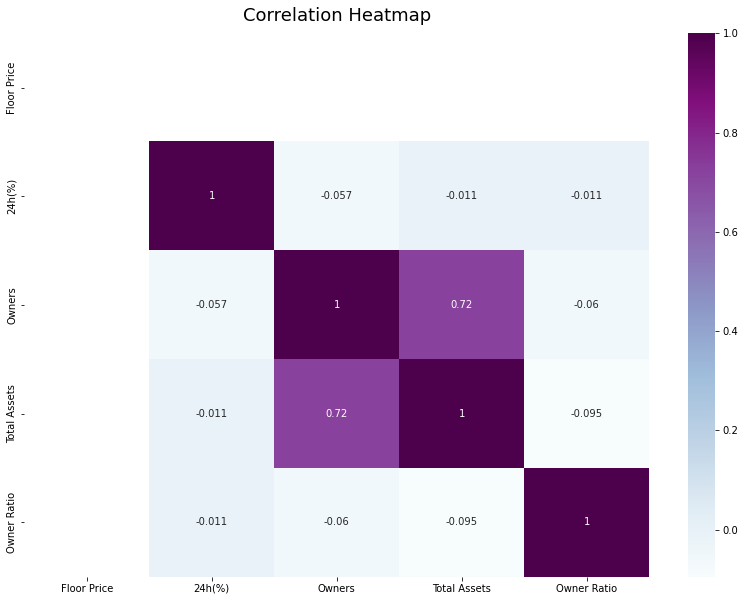

In [603]:
plt.figure(figsize=(14,10))
heatmap = sns.heatmap(df.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- É importante notar que como essa análise é dinâmica, muitas vezes os números indicados serão completamente diferentes por questões de flutuação de mercado. Nesse sentido, tentei fazer uma análise das relações de forma *a priori*, respaldadas pelos projetos principais da opensea de fevereiro, daqui a uma semana ou um mês ou um ano serão completamente diferentes.  

##Análise de cada coluna:

###Floor Price:

In [604]:
df['Floor Price']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
120    0.0
121    0.0
122    0.0
123    0.0
124    0.0
Name: Floor Price, Length: 125, dtype: float64

In [605]:
df['Floor Price'].describe()

count    125.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Floor Price, dtype: float64

In [606]:
df2 = df[df['Floor Price'] < 80]

In [607]:
df2['Floor Price'].describe()

count    125.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Floor Price, dtype: float64

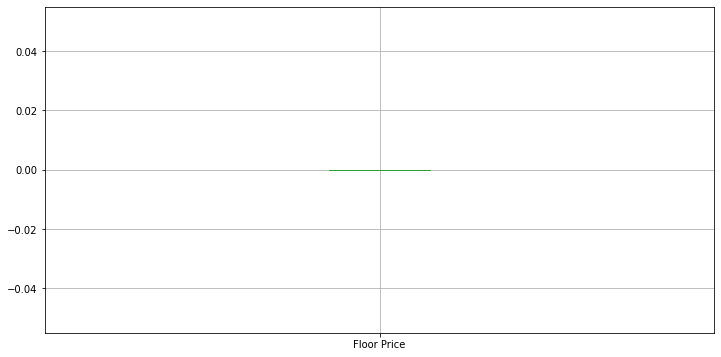

In [608]:
plt.figure(figsize=(12,6))
df2.boxplot('Floor Price')
plt.show()

- Os dados estão concentrados por volta de 0 e 5 ETH. O que nos indica lançamentos baixos, exceto por alguns outliers discrepantes.

####Visualização dos dados:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


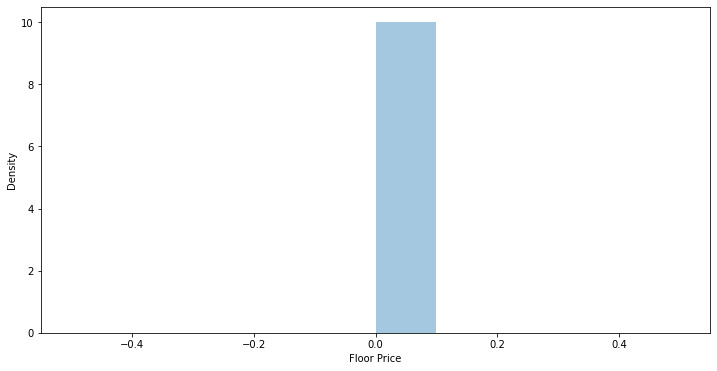

In [609]:
plt.figure(figsize=(12,6))
sns.distplot(df['Floor Price'], bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


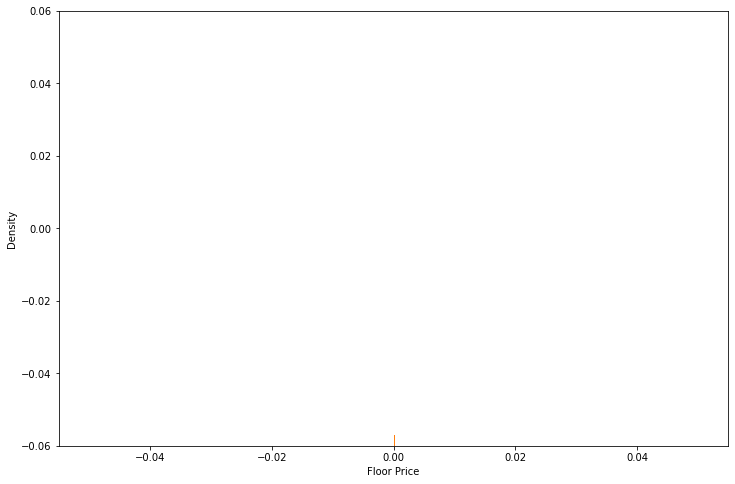

In [610]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Floor Price'])
sns.rugplot(df['Floor Price'])

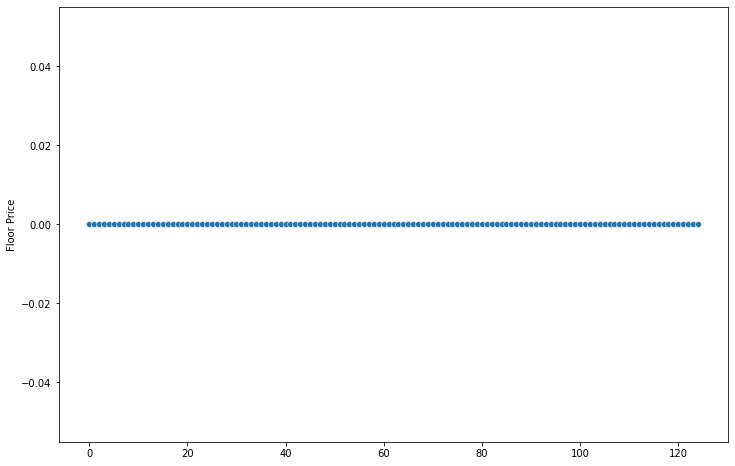

In [611]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Floor Price'])

- As visualizações ajudam a gente perceber a distribuição concentrada entre 0 e 5 ETH. Lembrando que 1 ETH, atualmente (10/02/2022) está por volta de $3.000,00. O Floor Price é o valor mais baixo para alguém ser participante de um projeto NFT. Considerando que são os projetos mais valorizados, é natural que esses projetos tenham floor prices altos.

###Variação nas últimas 24 horas:

- Essa coluna não nos informa muito sobre o dataset de um modo geral, visto que para termos uma informação de qualidade, sempre terá de ser dinâmica a relação mética fornecida nessa coluna, por isso as informações de estatística descritiva serão suficiente

In [612]:
df['24h(%)']

0       -1.6
1       -4.0
2        8.6
3       -2.4
4       -1.8
       ...  
120     -1.5
121    -85.4
122   -100.0
123    101.7
124     -7.6
Name: 24h(%), Length: 125, dtype: float64

In [613]:
df[df['24h(%)'] == 904]

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio


- É possível sabermos os NFTs que tem um crescimento nas últimas 24 horas acima da média:

In [614]:
df_mean24h = df[df['24h(%)'] > df['24h(%)'].mean() ]

In [615]:
df_mean24h.describe()

,Floor Price,24h(%),Owners,Total Assets,Owner Ratio
count,1.0,1.0,1.0,1.0,1.000000
mean,0.0,120507.7,2065.0,8992.0,22.964858
std,NaN,NaN,NaN,NaN,NaN
min,0.0,120507.7,2065.0,8992.0,22.964858
25%,0.0,120507.7,2065.0,8992.0,22.964858
50%,0.0,120507.7,2065.0,8992.0,22.964858
75%,0.0,120507.7,2065.0,8992.0,22.964858
max,0.0,120507.7,2065.0,8992.0,22.964858


Essas informações são bem interessantes, válida para o dia 10/02/2022:
- 25 NFTs dos 125 tem crescimento das últimas 24 horas acima da média
- 1.96 ETH é a média do Floor Price

####Visualização de dados:

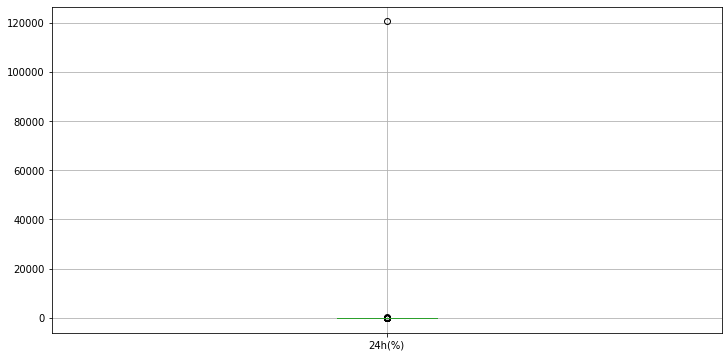

In [616]:
plt.figure(figsize=(12,6))
df.boxplot('24h(%)')
plt.show()

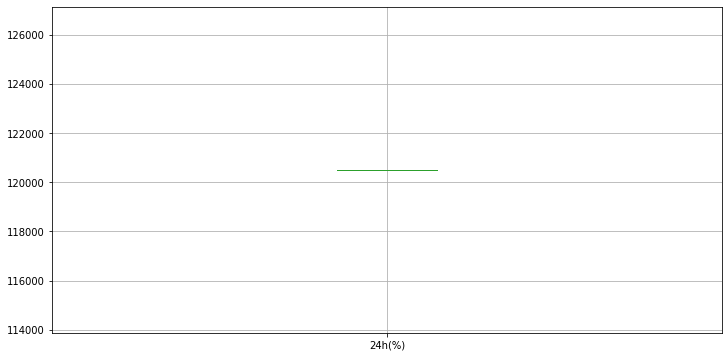

In [617]:
plt.figure(figsize=(12,6))
df_mean24h.boxplot('24h(%)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


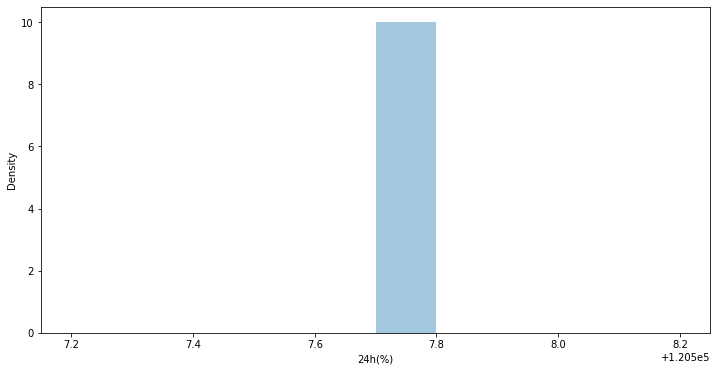

In [618]:
plt.figure(figsize=(12,6))
sns.distplot(df_mean24h['24h(%)'], bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


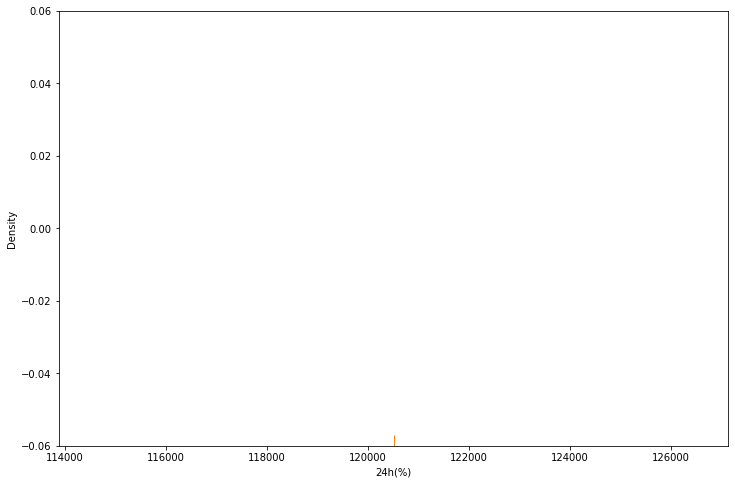

In [619]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_mean24h['24h(%)'])
sns.rugplot(df_mean24h['24h(%)'])

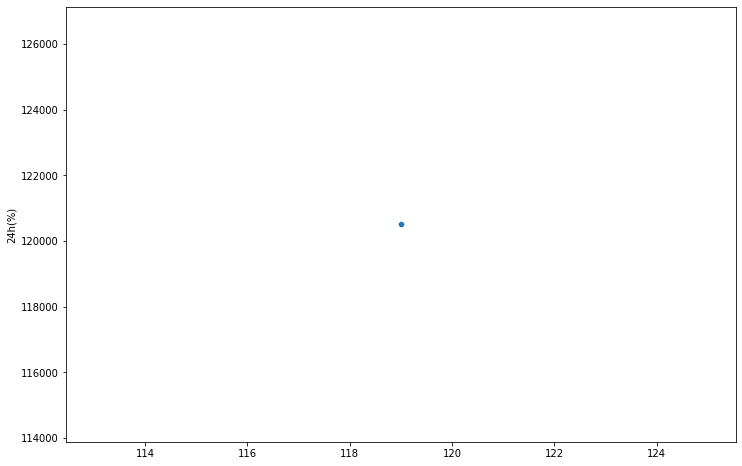

In [620]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_mean24h['24h(%)'])

- O Floor Price desses projetos com crescimento acima da média:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


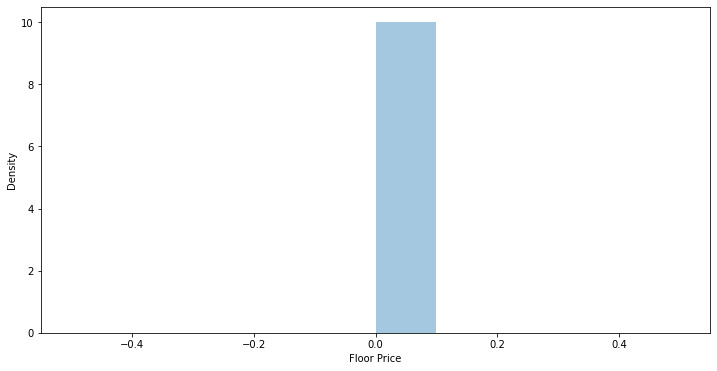

In [621]:
plt.figure(figsize=(12,6))
sns.distplot(df_mean24h['Floor Price'], bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


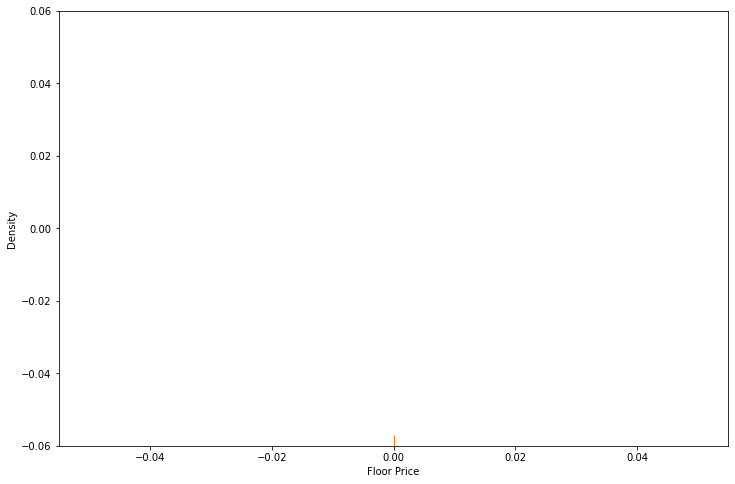

In [622]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_mean24h['Floor Price'])
sns.rugplot(df_mean24h['Floor Price'])

###Market Cap:

- O market cap é o que entenderíamos pela receita total do projeto. No entanto, muitos indicadores (incluindo a coingecko), simplesmente multiplicam a quantidade de NFTs (total assets) pelo preço do NFT mais baixo (floor price), o que significa que não é exatamente confiável. O market cap é o melhor parâmetro para entender o crescimento do projeto a longo prazo e o seu sucesso, porém, como tudo em finanças, não é uma medida exata, existem diversos outros fatores que garantem o sucesso de um projeto.

In [623]:
df['Market Cap'] = df['Market Cap'].astype(float)

In [624]:
df['Market Cap'].describe()

count       125.000000
mean      29164.350640
std      109334.865912
min           0.000000
25%         615.680000
50%        2452.750000
75%       13500.000000
max      990000.000000
Name: Market Cap, dtype: float64

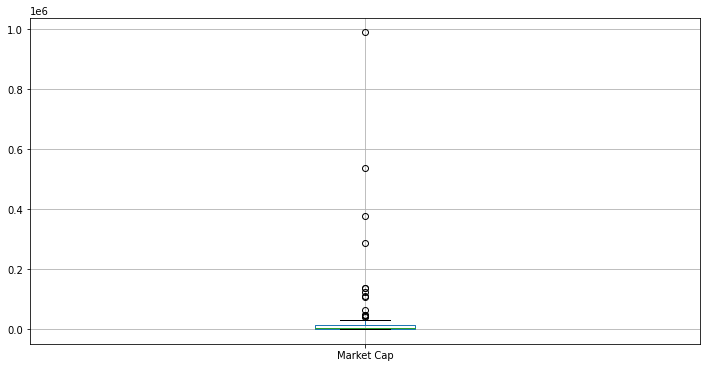

In [625]:
plt.figure(figsize=(12,6))
df.boxplot('Market Cap')
plt.show()

####Visualização de dados:

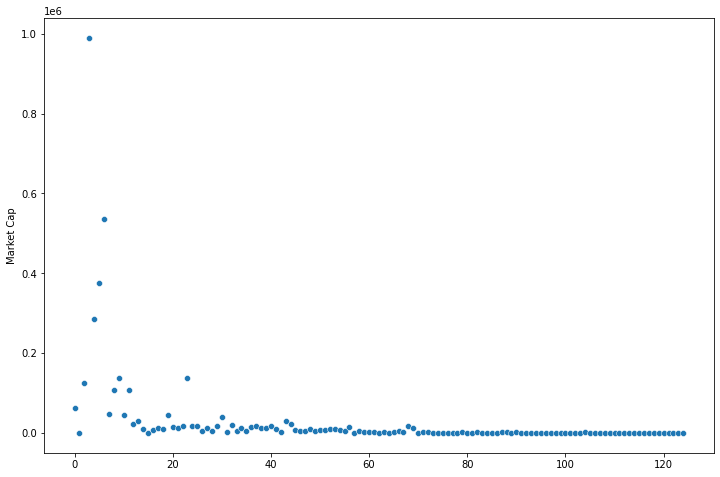

In [626]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Market Cap'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


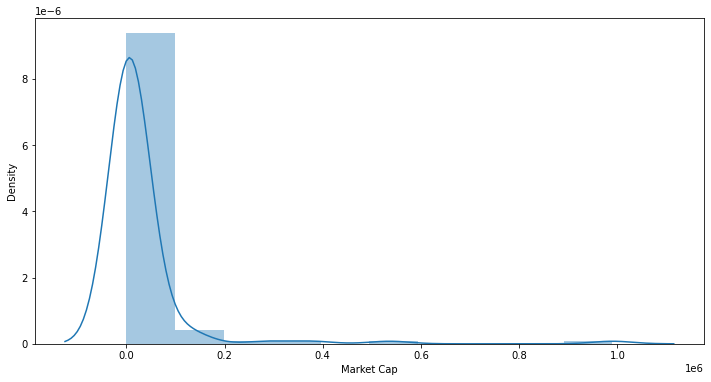

In [627]:
plt.figure(figsize=(12,6))
sns.distplot(df['Market Cap'], bins=10)

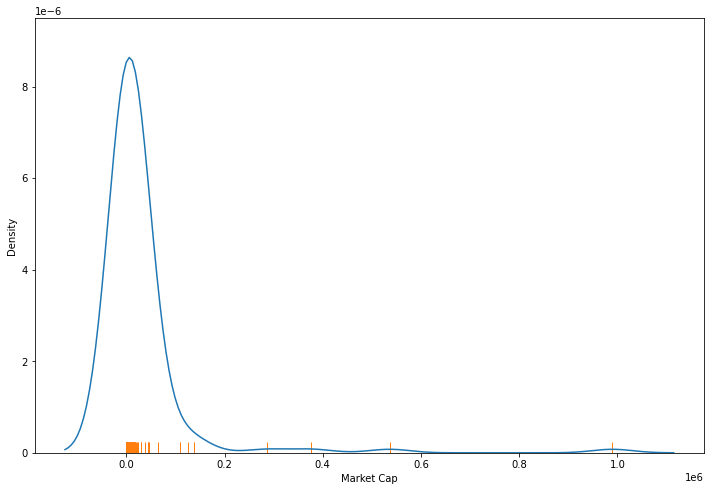

In [628]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Market Cap'])
sns.rugplot(df['Market Cap'])

A conclusão é que o Market Cap se mantém estável de um modo geral, tirando alguns Outliers acima de 20.000, ou ainda, podemos considerar que os Outliers se comprometem bastante acima do 3º Quartil (75%): 13587.1 ETH. Ainda mais quando se considera que a mediana é 2179 ETH, podemos entender que a maior parte dos projetos deve estar por volta desse valor.

In [629]:
df[df['Market Cap'] < 13587].describe()

,Floor Price,24h(%),Market Cap,Owners,Total Assets,Owner Ratio
count,94.0,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.0,1276.817021,2987.448617,3117.840426,9006.170213,1533.267489
std,0.0,12429.976174,3722.744803,1834.764679,6405.540756,10893.265146
min,0.0,-100.000000,0.000000,292.000000,3.000000,5.160000
25%,0.0,-10.400000,381.250000,1789.500000,5137.500000,30.142291
50%,0.0,-3.900000,1178.855000,2868.000000,8888.000000,37.956876
75%,0.0,-1.250000,4747.500000,4251.500000,10000.000000,49.635729
max,0.0,120507.700000,13500.000000,9242.000000,46169.000000,96466.666667


In [630]:
df_cap = df[df['Market Cap'] < 13587]

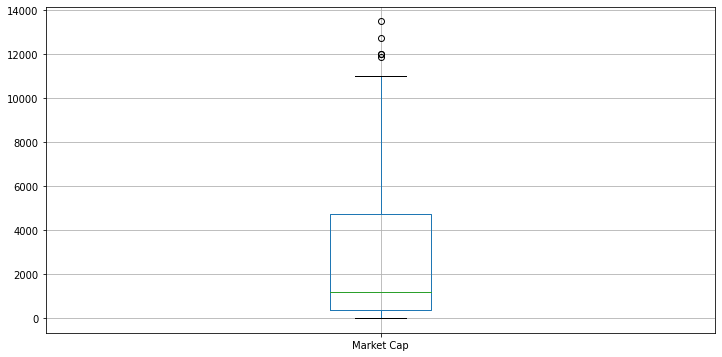

In [631]:
plt.figure(figsize=(12,6))
df_cap.boxplot('Market Cap')
plt.show()

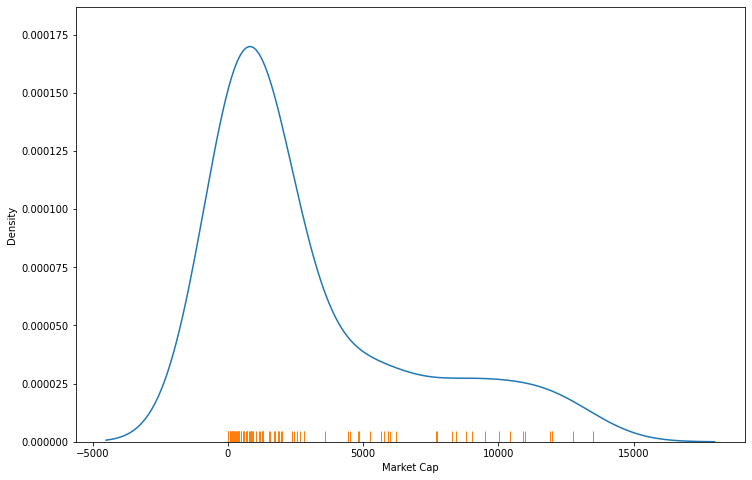

In [632]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_cap['Market Cap'])
sns.rugplot(df_cap['Market Cap'])

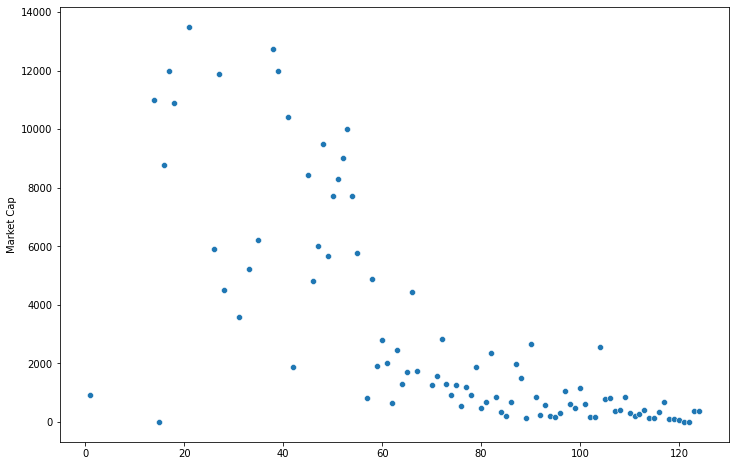

In [633]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_cap['Market Cap'])

- Diante dos gráficos, conseguimos compreender que ainda existe uma boa dispersão acima de por volta de 3000 ETH de market cap. Os projetos acima disso, talvez sejam o que devam ter uma atenção interessante para um investidor.

###Owners

In [634]:
df['Owners'].head()

0    5747.0
1    2650.0
2    5428.0
3    6312.0
4    8287.0
Name: Owners, dtype: float64

In [635]:
df['Owners'].tail()

120    2193.0
121    1325.0
122     292.0
123    1192.0
124    3963.0
Name: Owners, dtype: float64

In [636]:
df['Owners'].describe()

count      125.000000
mean      3709.224000
std       2601.799702
min        292.000000
25%       2085.000000
50%       3358.000000
75%       5025.000000
max      19690.000000
Name: Owners, dtype: float64

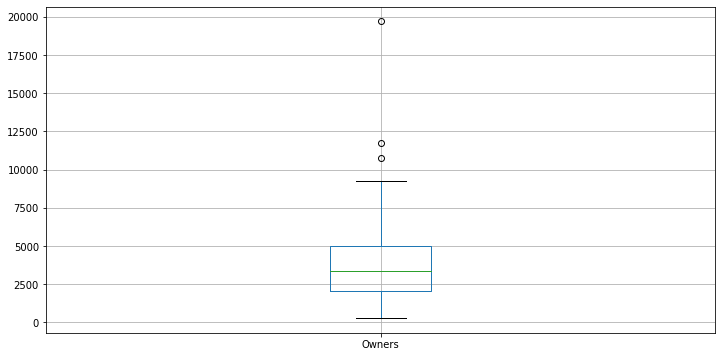

In [637]:
plt.figure(figsize=(12,6))
df.boxplot('Owners')
plt.show()

- Os proprietários do NFTs obedecem uma métrica muito mais concisa. O que isso nos indica? O fato é que um proprietário pode ter muitos NFTs e não possuímos esse número somente com essa feature. No entanto, o que podemos inferir é que os projetos que possuem muitos proprietários:
 - Estão completamente vendidos ou quase completamente.
 - Esses NFTs têm um preço baixo ou o projeto tem muita fama
 - Os projetos que têm poucos proprietários ou têm um preço alto ou têm pouco sucesso.

####Visualizações de dados:

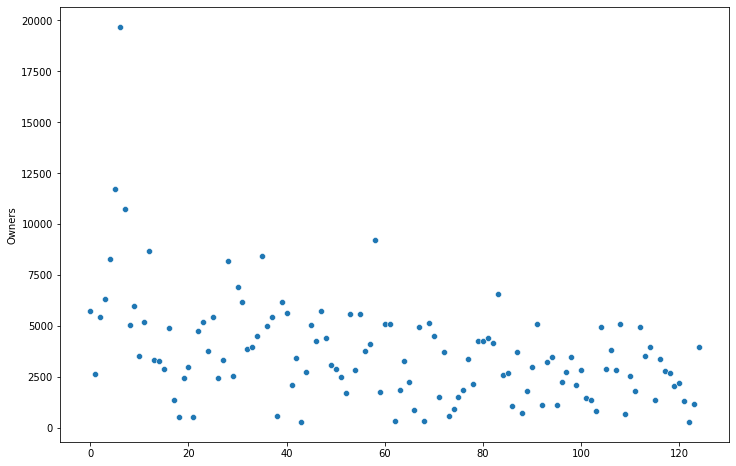

In [638]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Owners'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


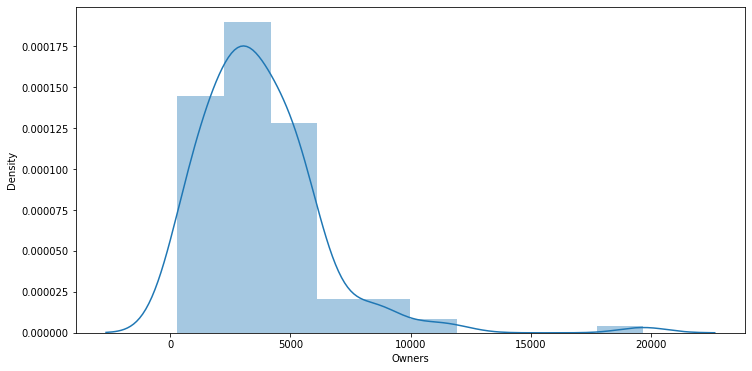

In [639]:
plt.figure(figsize=(12,6))
sns.distplot(df["Owners"], bins=10)

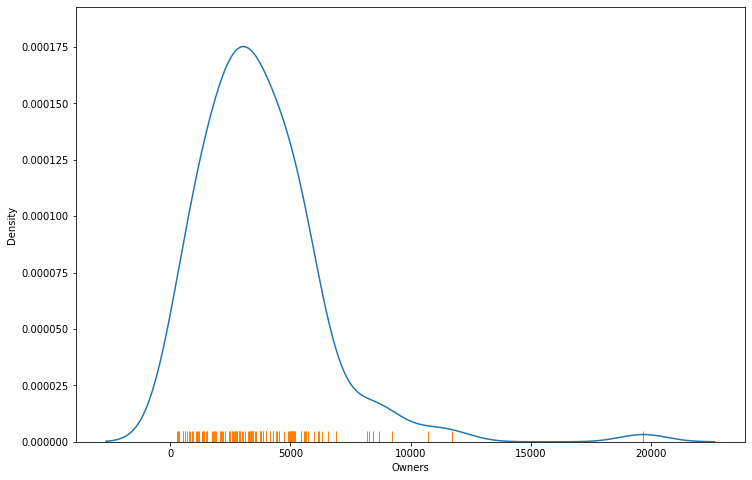

In [640]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Owners'])
sns.rugplot(df['Owners'])

###Total Assets

In [641]:
df['Total Assets'].head()

0    20000.0
1     4870.0
2    10000.0
3    10000.0
4    18872.0
Name: Total Assets, dtype: float64

In [642]:
df['Total Assets'].tail()

120    5554.0
121       3.0
122     526.0
123    3624.0
124    8008.0
Name: Total Assets, dtype: float64

In [643]:
df['Total Assets'].describe()

count       125.000000
mean      10702.088000
std       13593.807248
min           3.000000
25%        7025.000000
50%        9995.000000
75%       10000.000000
max      145700.000000
Name: Total Assets, dtype: float64

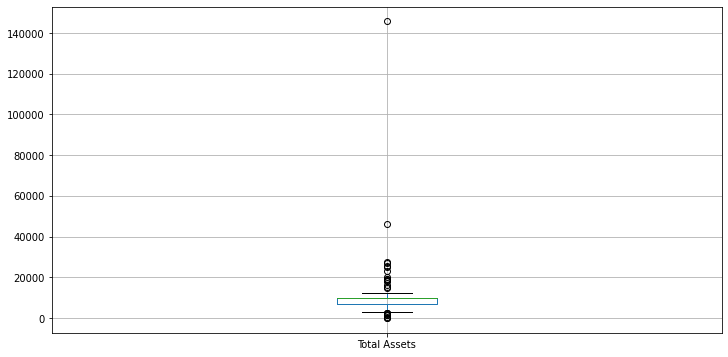

In [644]:
plt.figure(figsize=(12,6))
df.boxplot('Total Assets')
plt.show()

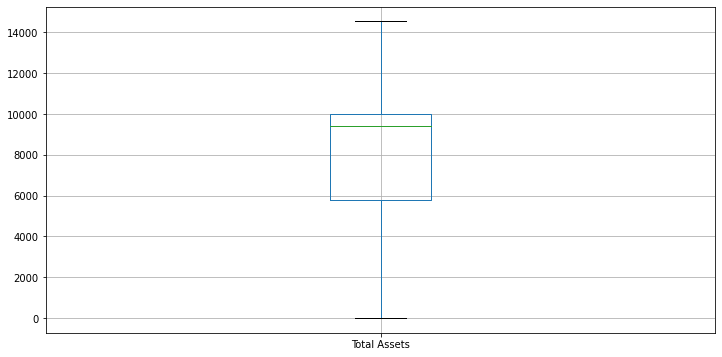

In [645]:
plt.figure(figsize=(12,6))
df[df['Total Assets'] < 15000].boxplot('Total Assets')
plt.show()

- A maior parte dos projetos tem até 15000 NFTs.

In [646]:
df_assets = df[df['Total Assets'] < 15000]
df_assets['Total Assets'].describe()

count      110.000000
mean      7936.327273
std       3035.931395
min          3.000000
25%       5780.750000
50%       9415.000000
75%      10000.000000
max      14533.000000
Name: Total Assets, dtype: float64

- 15 grandes outliers, ou seja, 15 projetos que tem uma quantidade NFTs que tão bem acima do 3º quartil. Ainda possuímos outliers com esse filtro, no entanto, é algo mais palatável.

####Visualização de dados:

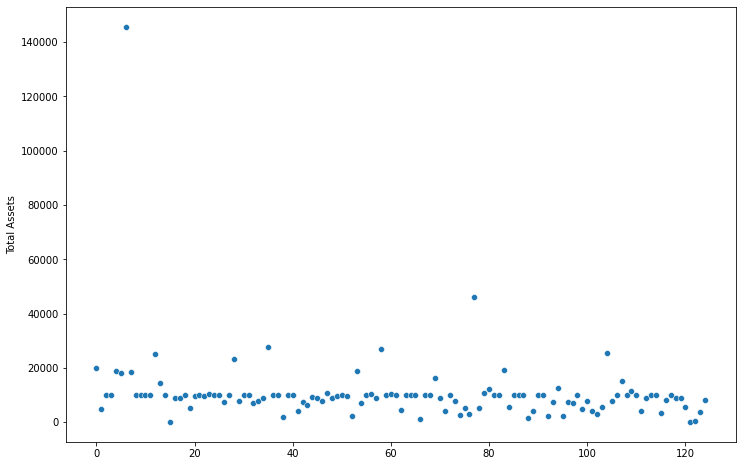

In [647]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Total Assets'])

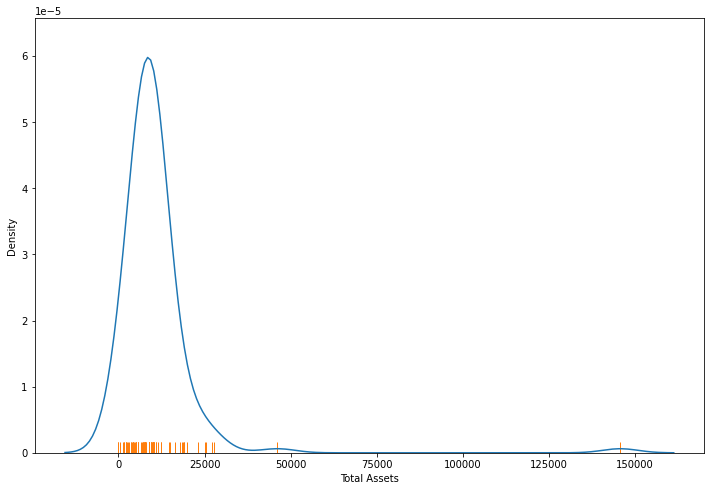

In [648]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Total Assets'])
sns.rugplot(df['Total Assets'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


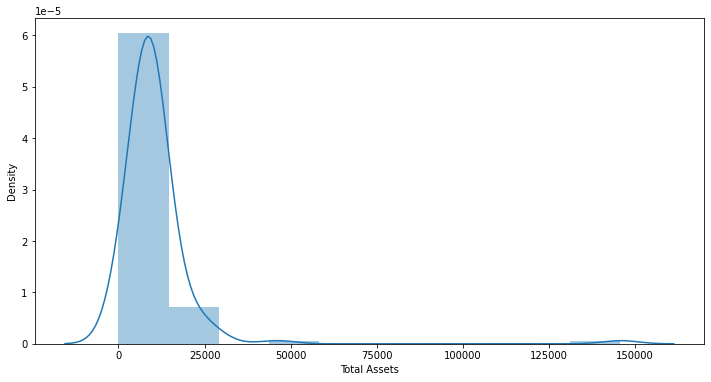

In [649]:
plt.figure(figsize=(12,6))
sns.distplot(df["Total Assets"], bins=10)

- Visualizações com filtragem feita:

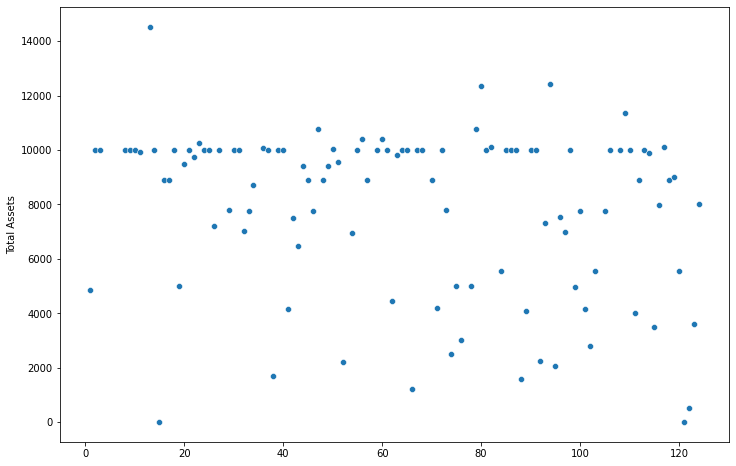

In [650]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_assets['Total Assets'])

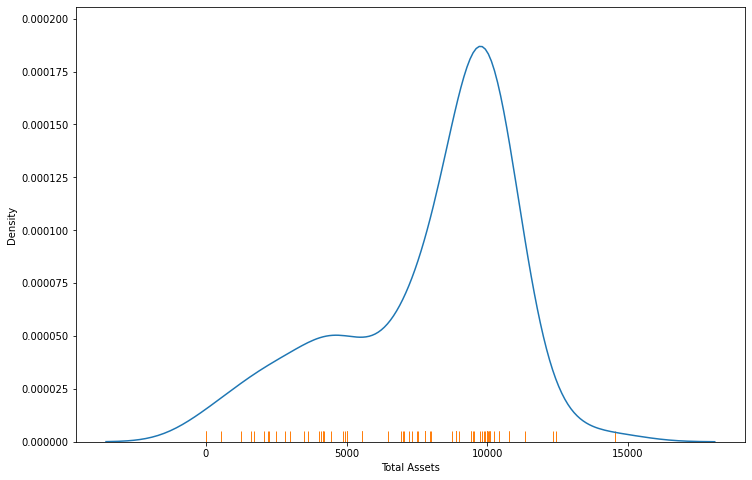

In [651]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_assets['Total Assets'])
sns.rugplot(df_assets['Total Assets'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


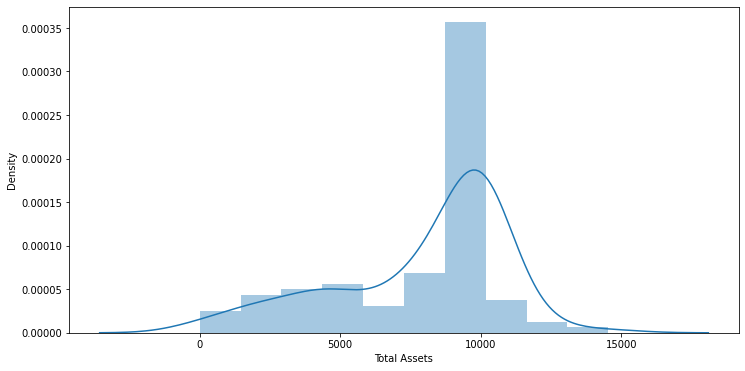

In [652]:
plt.figure(figsize=(12,6))
sns.distplot(df_assets["Total Assets"], bins=10)

- O interessante é pegarmos esses 14 projetos e entendê-los enquanto projetos que se distoam quanto a sua quantidade de NFTs, ver o seu Floor Price assim como a quantidade de Owners.

- A média de totais de NFTs dos projetos é 7796. A maior parte dos projetos, no entanto se concentra em 9409 ~ 10.000 NFTs.

###Owner Ratio:

In [653]:
df['Owner Ratio'].describe()

count      125.000000
mean      1163.647602
std       9455.955373
min          3.440000
25%         30.220000
50%         39.479703
75%         50.967597
max      96466.666667
Name: Owner Ratio, dtype: float64

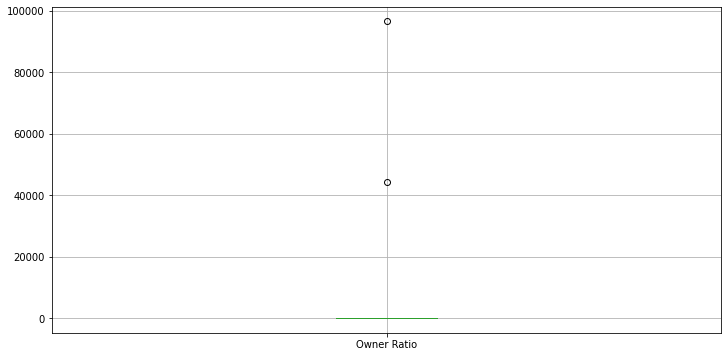

In [654]:
plt.figure(figsize=(12,6))
df.boxplot('Owner Ratio')
plt.show()

- Poucos outliers com considerações fortes.

In [655]:
df_ratio = df[df['Owner Ratio'] < 2500]
df_ratio

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,Meebits,0.0,-1.6,63800.00,16724.45,5747.0,0.0,20000.0,28.735000
1,dotdotdots,0.0,-4.0,925.30,6356.47,2650.0,0.2,4870.0,54.414784
2,Azuki,0.0,8.6,124900.00,1563.55,5428.0,0.1,10000.0,54.280000
3,Bored Ape Yacht Club,0.0,-2.4,990000.00,810.99,6312.0,0.0,10000.0,63.120000
4,CloneX,0.0,-1.8,285910.80,713.86,8287.0,0.1,18872.0,43.911615
...,...,...,...,...,...,...,...,...,...
119,Template,0.0,120507.7,107.90,0.03,2065.0,-0.1,8992.0,22.964858
120,Night Kids,0.0,-1.5,66.09,0.01,2193.0,0.0,5554.0,39.485056
122,Strange Attractors,0.0,-100.0,0.00,0.0,292.0,0.0,526.0,55.513308
123,United Punks Union,0.0,101.7,362.40,0.0,1192.0,0.0,3624.0,32.891832


In [656]:
df_ratio['Owner Ratio'].describe()

count    123.000000
mean      39.208268
std       15.567935
min        3.440000
25%       30.199582
50%       39.471429
75%       50.831519
max       78.034420
Name: Owner Ratio, dtype: float64

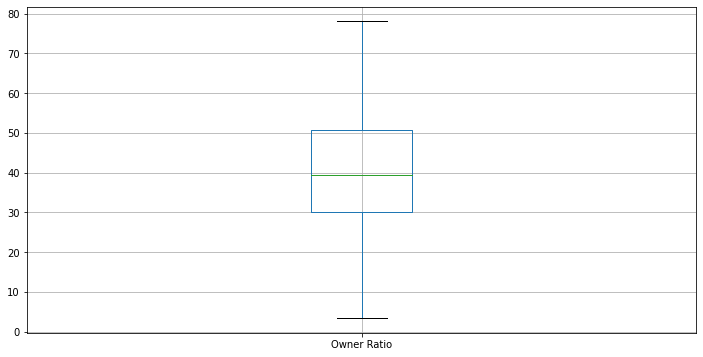

In [657]:
plt.figure(figsize=(12,6))
df_ratio.boxplot('Owner Ratio')
plt.show()

- O que isso significa? O owner ratio é a razão entre a quantidade de proprietários que o projeto possui / Quantidade de NFTs do projeto. Portanto, quanto mais próximo de 1, mais próximo o projeto está de ter vendido tudo de certo. No entanto, isso não significa que quanto mais distante de 1 menos  chances do projeto ter vendido todos seus NFTs, visto que um proprietário pode ter mais de um NFT.

#4ºParte: Analisando as relações do início:

##Premissas:

1. O market cap é uma das features mais significativas, visto que é um dos parâmetros principais que os compradores olham ao avaliar um projeto NFT.

2. Podemos considerar, por ser os top projetos NFTs, que eles deram sold out, ou seja, eles foram completamente vendidos. Por que isso é relevante? Quando um projeto tem todos seus NFTs vendidos, ele é considerado um bom projeto e o seu floor price se estabiliza, na maioria das vezes. Não é incomum um projeto estar completamente vendido.

3. Como busco identificar quais projetos se destacam de alguma maneira e quais indicadores a maior parte dos projetos possuem, as colunas que devem ser ressaltadas são: o floor price, market cap e owners (preço de "chão" (preço do NFT mais barato), receita do projeto e os proprietários).


##Hipóteses e demonstrações:


###O market cap é verdadeiro?

- Muitos sites são conhecidos por não apresentar um market cap correto. O que posso fazer para verificar essa informação? Sei que, no mínimo, o market cap vai ser maior do que Total_assets (total de ativos) multiplicado floor_price (o preço do NFT mais baixo do projeto). 

In [658]:
total_assets = []
floor_price = []

for price in df['Floor Price']:
  floor_price.append(price)

for asset in df['Total Assets']:
  total_assets.append(asset)


In [659]:
makt_caps = []
for i in range(len(total_assets)):
  makt_cap = floor_price[i]*total_assets[i]
  makt_caps.append(makt_cap)

In [660]:
makt_caps2 = []
for makt_cap in df['Market Cap']:
  makt_caps2.append(makt_cap)

In [661]:
larger = []
equal = []
smaller = []

flag=0
for i in range(len(makt_caps)):
  if makt_caps[i] == makt_caps2[i]:
    flag = 1
    equal.append(flag)
  elif makt_caps[i] > makt_caps2[i]:
    flag = 2
    equal.append(flag)
  elif makt_caps[i] < makt_caps2[i]:
    flag = 3
    smaller.append(flag)

- As flags indicam se o market cap do dataset é igual, menor ou maior que a multiplicação dos ativos totais do projeto com o floor price.

In [662]:
print(len(equal), len(smaller), len(larger))

2 123 0


- Aqui temos as relações. No dia 10/02, encontrei nenhum market cap maior que a multiplicação e inclusive, 19 marketcaps eram menores do que a relação floor_price * total_assets, o que indica que ele é *menor* do que o mínimo esperado. Portanto, o que indica que essa coluna não é verídica. No entanto, é importante ressaltar que não é um dado descartável visto que a maior parte (106) dos market caps indicam o market cap *mínimo*. O que podemos saber é que ele não é o verdadeiro market cap do projeto.

###Relações do floor price:

In [663]:
df_fp = pd.DataFrame([df['Floor Price'], df['Market Cap']])

In [664]:
df_fp = df_fp.transpose()

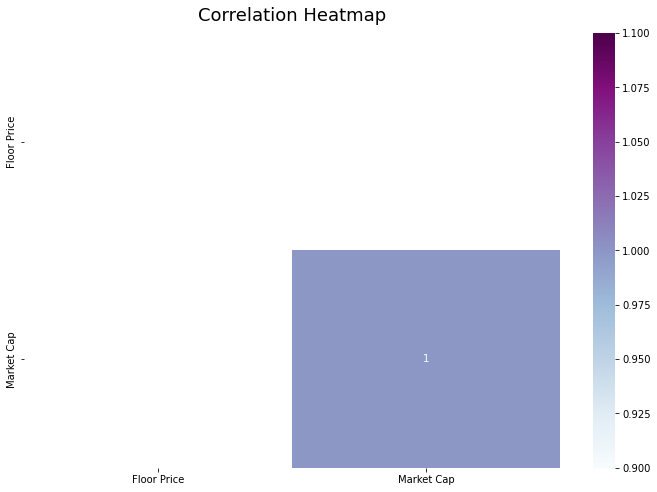

In [665]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(df_fp.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Essa informação é importante, um alto indice de correlação, mas não é uma informação vital visto o que foi demonstrado acima.

###Quanto mais ativos, mais proprietários terá o projeto?

In [666]:
df2 = pd.DataFrame([df['Owners'], df['Total Assets']])

In [667]:
df2.transpose().describe()

,Owners,Total Assets
count,125.000000,125.000000
mean,3709.224000,10702.088000
std,2601.799702,13593.807248
min,292.000000,3.000000
25%,2085.000000,7025.000000
50%,3358.000000,9995.000000
75%,5025.000000,10000.000000
max,19690.000000,145700.000000


In [668]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
Owners,5747.0,2650.0,5428.0,6312.0,8287.0,11740.0,19690.0,10743.0,5076.0,5996.0,3535.0,5177.0,8696.0,3358.0,3272.0,2894.0,4913.0,1393.0,516.0,2435.0,2986.0,519.0,4738.0,5202.0,3770.0,5427.0,2466.0,3341.0,8179.0,2547.0,6914.0,6157.0,3865.0,3965.0,4529.0,8429.0,5025.0,5430.0,603.0,6196.0,...,2703.0,1061.0,3720.0,755.0,1824.0,3013.0,5109.0,1145.0,3238.0,3459.0,1104.0,2274.0,2763.0,3459.0,2085.0,2846.0,1475.0,1378.0,813.0,4963.0,2903.0,3840.0,2859.0,5107.0,679.0,2572.0,1839.0,4949.0,3546.0,3997.0,1381.0,3396.0,2788.0,2675.0,2065.0,2193.0,1325.0,292.0,1192.0,3963.0
Total Assets,20000.0,4870.0,10000.0,10000.0,18872.0,17958.0,145700.0,18401.0,10000.0,10000.0,10000.0,9933.0,24999.0,14533.0,10000.0,3.0,8888.0,8888.0,10000.0,5000.0,9500.0,10000.0,9757.0,10255.0,10000.0,10000.0,7216.0,10000.0,23204.0,7779.0,10000.0,10000.0,7025.0,7776.0,8732.0,27681.0,10080.0,10000.0,1700.0,10000.0,...,9999.0,10000.0,9999.0,1600.0,4096.0,10000.0,10000.0,2250.0,7335.0,12442.0,2048.0,7535.0,7000.0,9999.0,4950.0,7777.0,4160.0,2799.0,5555.0,25456.0,7777.0,10000.0,15000.0,10000.0,11357.0,10000.0,4027.0,8888.0,10000.0,9899.0,3498.0,7976.0,10100.0,8888.0,8992.0,5554.0,3.0,526.0,3624.0,8008.0


In [669]:
df2 = df2.transpose()

In [670]:
df2

,Owners,Total Assets
0,5747.0,20000.0
1,2650.0,4870.0
2,5428.0,10000.0
3,6312.0,10000.0
4,8287.0,18872.0
...,...,...
120,2193.0,5554.0
121,1325.0,3.0
122,292.0,526.0
123,1192.0,3624.0


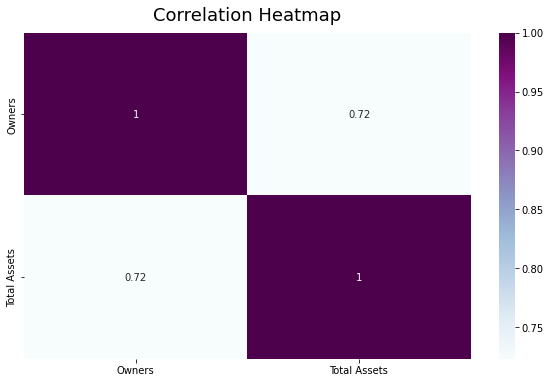

In [671]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df2.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Correlação forte! Não necessariamente um projeto terá mais proprietários quando se tem mais ativos, visto que um projeto pode ter muitos ativos e poucos donos - o que indicaria, muito provavelmente, que os ativos estão em um preço baixo, mas com expectativa de lucro. 

- Se o projeto tem muitos ativos e muitos donos, é muito provável que o preço esteja razoalvemente equilibrado na proporção entre os dois. Essa relação é espelhada na coluna owners_ratio.

###Há alguma relação entre o market cap e o total de ativos?

In [672]:
df3 = pd.DataFrame([df['Market Cap'], df['Total Assets']])

In [673]:
df3 = df3.transpose()

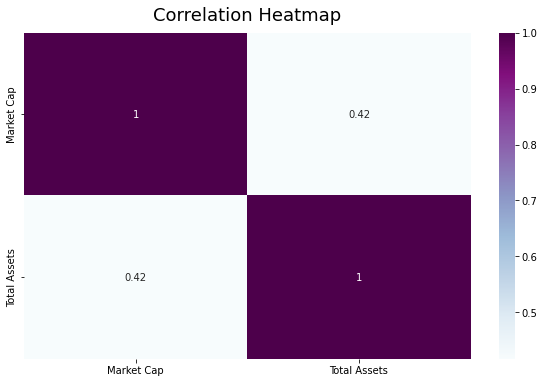

In [674]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df3.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Resposta: não é uma correlação forte, mas existe um indicativo. Não necessariamente quanto mais ativos, mais receita aquele projeto terá.

###Correlacionando o proprietários, total de ativos e market cap:

In [675]:
df4 = pd.DataFrame([df['Owners'], df['Total Assets'], df['Market Cap']])

In [676]:
df4 = df4.transpose()

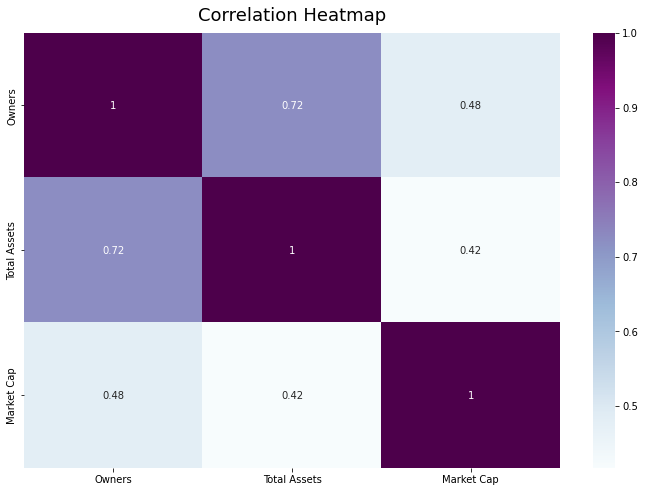

In [677]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(df4.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Como podemos observar, a interação nova é entre proprietários e market cap

##Conclusões
